# Produce conditional distributions in 5 regions.

Regions defined by MCS data:

* MCS core
* MCS shield
* cloud core
* cloud shield
* env

Areas are mutually exclusive - MCS core and MCS shield do not overlap. Results from here used for EGU talk.

* pre 24/4/23 EGU: work on data for one year (2019). Work without spatial info, apart from to split land/ocean (EGU talk on MCS *over land*).
* post EGU: redo analysis to save original info (as before - in "hist") and conditional distributions at each gridpoint ("hist2"). Make sure that the two methods agree where they should with proper summing.

In [2]:
import datetime as dt
from pathlib import Path

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import dask
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import xarray as xr

from mcs_prime import McsTracks
from mcs_prime.mcs_prime_config import PATHS
from mcs_prime import plotting as mplt

from remake import load_remake

In [3]:
era5_hists = load_remake('../../remakefiles/era5_histograms.py')

In [4]:
task = era5_hists.ConditionalERA5HistHourly.tasks[0]

In [5]:
paths2 = [t.outputs['hist'] for t in era5_hists.ConditionalERA5HistGridpoint.tasks]
paths2 = [p for p in paths2 if p.exists()]
paths2

[PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_01.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_02.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_03.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_04.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_05.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_06.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_07.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_his

In [6]:
path = Path('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020.nc')

In [20]:
paths3 = [t.outputs['hist'] for t in era5_hists.ConditionalERA5HistMeanfield.tasks]

paths3

[PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/meanfield_hist_2020_01.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/meanfield_hist_2020_02.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/meanfield_hist_2020_03.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/meanfield_hist_2020_04.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/meanfield_hist_2020_05.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/meanfield_hist_2020_06.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/meanfield_hist_2020_07.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/meanfield_his

In [21]:
ds3 = xr.open_mfdataset(paths3)

In [6]:
# datasets = [xr.open_dataset(p) for p in paths2[:2]]

In [8]:
# ds2 = datasets[0]
ds2 = xr.open_dataset(path)
ds2

<xarray.Dataset>
Dimensions:                 (latitude: 481, longitude: 1440,
                             cape_hist_mid: 100, tcwv_hist_mid: 100,
                             LLS_shear_hist_mid: 100, L2M_shear_hist_mid: 100,
                             MLS_shear_hist_mid: 100, vimfd_hist_mid: 100,
                             cape_hist_mids: 100, cape_bins: 101,
                             tcwv_hist_mids: 100, tcwv_bins: 101,
                             LLS_shear_hist_mids: 100, LLS_shear_bins: 101,
                             L2M_shear_hist_mids: 100, L2M_shear_bins: 101,
                             MLS_shear_hist_mids: 100, MLS_shear_bins: 101,
                             vimfd_hist_mids: 100, vimfd_bins: 101)
Coordinates: (12/14)
  * latitude                (latitude) float32 60.0 59.75 59.5 ... -59.75 -60.0
  * longitude               (longitude) float32 0.0 0.25 0.5 ... 359.5 359.8
  * cape_hist_mids          (cape_hist_mids) float64 25.0 75.0 ... 4.975e+03
  * cape_bins               (cape_bins) float64 0.0 50.0 ... 4.95e+03 5e+03
  * tcwv_hist_mids          (tcwv_hist_mids) float64 0.5 1.5 2.5 ... 98.5 99.5
  * tcwv_bins               (tcwv_bins) float64 0.0 1.0 2.0 ... 98.0 99.0 100.0
    ...                      ...
  * L2M_shear_hist_mids     (L2M_shear_hist_mids) float64 0.5 1.5 ... 98.5 99.5
  * L2M_shear_bins          (L2M_shear_bins) float64 0.0 1.0 2.0 ... 99.0 100.0
  * MLS_shear_hist_mids     (MLS_shear_hist_mids) float64 0.5 1.5 ... 98.5 99.5
  * MLS_shear_bins          (MLS_shear_bins) float64 0.0 1.0 2.0 ... 99.0 100.0
  * vimfd_hist_mids         (vimfd_hist_mids) float64 -9.9e-06 ... 9.9e-06
  * vimfd_bins              (vimfd_bins) float64 -1e-05 -9.8e-06 ... 1e-05
Dimensions without coordinates: cape_hist_mid, tcwv_hist_mid,
                                LLS_shear_hist_mid, L2M_shear_hist_mid,
                                MLS_shear_hist_mid, vimfd_hist_mid
Data variables: (12/30)
    cape_MCS_shield         (latitude, longitude, cape_hist_mid) int16 ...
    cape_MCS_core           (latitude, longitude, cape_hist_mid) int16 ...
    cape_cloud_shield       (latitude, longitude, cape_hist_mid) int16 ...
    cape_cloud_core         (latitude, longitude, cape_hist_mid) int16 ...
    cape_env                (latitude, longitude, cape_hist_mid) int16 ...
    tcwv_MCS_shield         (latitude, longitude, tcwv_hist_mid) int16 ...
    ...                      ...
    MLS_shear_env           (latitude, longitude, MLS_shear_hist_mid) int16 ...
    vimfd_MCS_shield        (latitude, longitude, vimfd_hist_mid) int16 ...
    vimfd_MCS_core          (latitude, longitude, vimfd_hist_mid) int16 ...
    vimfd_cloud_shield      (latitude, longitude, vimfd_hist_mid) int16 ...
    vimfd_cloud_core        (latitude, longitude, vimfd_hist_mid) int16 ...
    vimfd_env               (latitude, longitude, vimfd_hist_mid) int16 ...

In [8]:
# Right syntax/invocation? Don't know - the kernal crashes when I try to run.
# Despite limiting to 2 datasets.
# ds2 = xr.concat(datasets, pd.Index(range(len(datasets)), name='time_index'))

In [8]:
ds2.cape_MCS_core.sum(dim=['latitude', 'longitude'])

<xarray.DataArray 'cape_MCS_core' (cape_hist_mid: 100)>
array([1.9643e+04, 6.3250e+03, 7.3620e+03, 8.4620e+03, 9.4740e+03,
       1.0823e+04, 1.1687e+04, 1.2603e+04, 1.2432e+04, 1.2267e+04,
       1.1640e+04, 1.0724e+04, 9.7160e+03, 8.4100e+03, 7.5460e+03,
       6.3810e+03, 5.4700e+03, 4.7760e+03, 4.1240e+03, 3.5370e+03,
       3.1230e+03, 2.7180e+03, 2.4680e+03, 2.1250e+03, 1.9000e+03,
       1.5790e+03, 1.4460e+03, 1.2840e+03, 1.2000e+03, 1.0560e+03,
       9.3300e+02, 8.8900e+02, 8.1600e+02, 7.3400e+02, 6.5400e+02,
       6.1500e+02, 5.7500e+02, 4.9900e+02, 4.8400e+02, 4.4500e+02,
       4.2500e+02, 3.7500e+02, 4.2100e+02, 3.5000e+02, 3.4900e+02,
       3.1700e+02, 2.6300e+02, 2.7200e+02, 2.3600e+02, 2.5100e+02,
       2.2100e+02, 2.0000e+02, 2.1000e+02, 1.7100e+02, 1.6600e+02,
       1.4100e+02, 1.1600e+02, 1.1700e+02, 1.0400e+02, 5.6000e+01,
       6.3000e+01, 7.3000e+01, 5.5000e+01, 5.3000e+01, 4.9000e+01,
       4.1000e+01, 4.5000e+01, 3.2000e+01, 3.4000e+01, 3.7000e+01,
       3.5000e+01, 2.8000e+01, 2.6000e+01, 2.4000e+01, 1.5000e+01,
       2.7000e+01, 1.6000e+01, 1.4000e+01, 8.0000e+00, 1.3000e+01,
       8.0000e+00, 7.0000e+00, 3.0000e+00, 9.0000e+00, 9.0000e+00,
       1.1000e+01, 8.0000e+00, 9.0000e+00, 8.0000e+00, 4.0000e+00,
       3.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00])
Dimensions without coordinates: cape_hist_mid

In [9]:
paths = [t.outputs['hist'] for t in era5_hists.ConditionalERA5HistHourly.tasks]
paths = [p for p in paths if p.exists()]
paths

[PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_01.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_02.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_03.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_04.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_05.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_06.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_07.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_08.nc'),
 PosixPa

In [17]:
ds = xr.open_mfdataset(paths)

In [18]:
ds

<xarray.Dataset>
Dimensions:                       (time: 8766, cape_hist_mid: 100,
                                   tcwv_hist_mid: 100, LLS_shear_hist_mid: 100,
                                   L2M_shear_hist_mid: 100,
                                   MLS_shear_hist_mid: 100,
                                   vimfd_hist_mid: 100, cape_hist_mids: 100,
                                   cape_bins: 101, tcwv_hist_mids: 100,
                                   ...
                                   LLS_shear_bins: 101,
                                   L2M_shear_hist_mids: 100,
                                   L2M_shear_bins: 101,
                                   MLS_shear_hist_mids: 100,
                                   MLS_shear_bins: 101, vimfd_hist_mids: 100,
                                   vimfd_bins: 101)
Coordinates: (12/13)
  * time                          (time) datetime64[ns] 2020-01-01T00:30:00 ....
  * cape_hist_mids                (cape_hist_mids) float64 25.0 ... 4.975e+03
  * cape_bins                     (cape_bins) float64 0.0 50.0 ... 5e+03
  * tcwv_hist_mids                (tcwv_hist_mids) float64 0.5 1.5 ... 98.5 99.5
  * tcwv_bins                     (tcwv_bins) float64 0.0 1.0 2.0 ... 99.0 100.0
  * LLS_shear_hist_mids           (LLS_shear_hist_mids) float64 0.5 1.5 ... 99.5
    ...                            ...
  * L2M_shear_hist_mids           (L2M_shear_hist_mids) float64 0.5 1.5 ... 99.5
  * L2M_shear_bins                (L2M_shear_bins) float64 0.0 1.0 ... 100.0
  * MLS_shear_hist_mids           (MLS_shear_hist_mids) float64 0.5 1.5 ... 99.5
  * MLS_shear_bins                (MLS_shear_bins) float64 0.0 1.0 ... 100.0
  * vimfd_hist_mids               (vimfd_hist_mids) float64 -9.9e-06 ... 9.9e-06
  * vimfd_bins                    (vimfd_bins) float64 -1e-05 -9.8e-06 ... 1e-05
Dimensions without coordinates: cape_hist_mid, tcwv_hist_mid,
                                LLS_shear_hist_mid, L2M_shear_hist_mid,
                                MLS_shear_hist_mid, vimfd_hist_mid
Data variables: (12/90)
    all_cape_MCS_shield           (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    all_cape_MCS_core             (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    all_cape_cloud_shield         (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    all_cape_cloud_core           (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    all_cape_env                  (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    land_cape_MCS_shield          (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ...                            ...
    land_vimfd_env                (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ocean_vimfd_MCS_shield        (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ocean_vimfd_MCS_core          (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ocean_vimfd_cloud_shield      (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ocean_vimfd_cloud_core        (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ocean_vimfd_env               (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>

In [12]:
ds.all_cape_MCS_core.sum(dim='time')

<xarray.DataArray 'all_cape_MCS_core' (cape_hist_mid: 100)>
array([1.9643e+04, 6.3250e+03, 7.3620e+03, 8.4620e+03, 9.4740e+03,
       1.0823e+04, 1.1687e+04, 1.2603e+04, 1.2432e+04, 1.2267e+04,
       1.1640e+04, 1.0724e+04, 9.7160e+03, 8.4100e+03, 7.5460e+03,
       6.3810e+03, 5.4700e+03, 4.7760e+03, 4.1240e+03, 3.5370e+03,
       3.1230e+03, 2.7180e+03, 2.4680e+03, 2.1250e+03, 1.9000e+03,
       1.5790e+03, 1.4460e+03, 1.2840e+03, 1.2000e+03, 1.0560e+03,
       9.3300e+02, 8.8900e+02, 8.1600e+02, 7.3400e+02, 6.5400e+02,
       6.1500e+02, 5.7500e+02, 4.9900e+02, 4.8400e+02, 4.4500e+02,
       4.2500e+02, 3.7500e+02, 4.2100e+02, 3.5000e+02, 3.4900e+02,
       3.1700e+02, 2.6300e+02, 2.7200e+02, 2.3600e+02, 2.5100e+02,
       2.2100e+02, 2.0000e+02, 2.1000e+02, 1.7100e+02, 1.6600e+02,
       1.4100e+02, 1.1600e+02, 1.1700e+02, 1.0400e+02, 5.6000e+01,
       6.3000e+01, 7.3000e+01, 5.5000e+01, 5.3000e+01, 4.9000e+01,
       4.1000e+01, 4.5000e+01, 3.2000e+01, 3.4000e+01, 3.7000e+01,
       3.5000e+01, 2.8000e+01, 2.6000e+01, 2.4000e+01, 1.5000e+01,
       2.7000e+01, 1.6000e+01, 1.4000e+01, 8.0000e+00, 1.3000e+01,
       8.0000e+00, 7.0000e+00, 3.0000e+00, 9.0000e+00, 9.0000e+00,
       1.1000e+01, 8.0000e+00, 9.0000e+00, 8.0000e+00, 4.0000e+00,
       3.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00])
Dimensions without coordinates: cape_hist_mid

In [13]:
(ds2.cape_MCS_core.sum(dim=['latitude', 'longitude']).values == ds.all_cape_MCS_core.sum(dim='time').values).all()

True

/tmp/ipykernel_596/364799786.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_596/364799786.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_596/364799786.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)


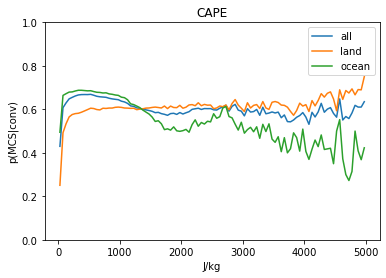

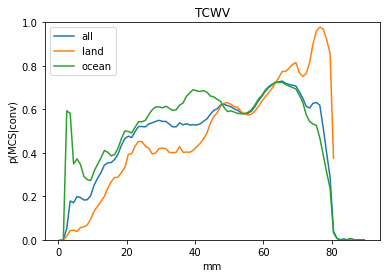

In [19]:
hists = {}

for v in ['cape', 'tcwv']:
    plt.figure()
    plt.title(v.upper())
    for reg in ['all', 'land', 'ocean']:
        d1 = ds[f'{reg}_{v}_MCS_core'].sum(dim='time').values
        d2 = ds[f'{reg}_{v}_cloud_core'].sum(dim='time').values
        d = d1 / (d1 + d2)
        hists[(v, reg)] = d
    
        plt.plot(ds[f'{v}_hist_mids'].values, d, label=reg)
    if v == 'cape':
        plt.xlabel('J/kg')
    elif v == 'tcwv':
        plt.xlabel('mm')
    plt.ylabel('p(MCS|conv)')
    plt.ylim((0, 1))
    plt.legend()

/tmp/ipykernel_596/3403260107.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_596/3403260107.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_596/3403260107.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_596/3403260107.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_596/3403260107.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_596/3403260107.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)


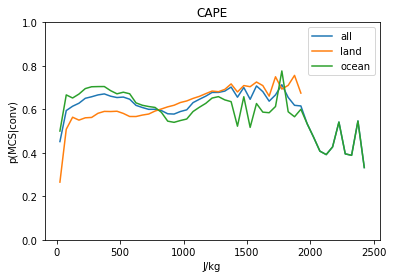

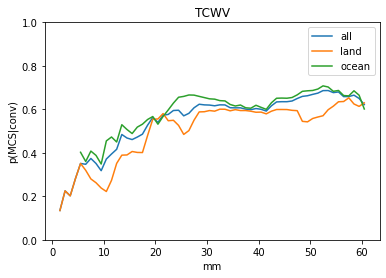

In [22]:
hists = {}

for v in ['cape', 'tcwv']:
    plt.figure()
    plt.title(v.upper())
    for reg in ['all', 'land', 'ocean']:
        d1 = ds3[f'{reg}_{v}_MCS_core'].sum(dim='time').values
        d2 = ds3[f'{reg}_{v}_cloud_core'].sum(dim='time').values
        d = d1 / (d1 + d2)
        hists[(v, reg)] = d
    
        plt.plot(ds[f'{v}_hist_mids'].values, d, label=reg)
    if v == 'cape':
        plt.xlabel('J/kg')
    elif v == 'tcwv':
        plt.xlabel('mm')
    plt.ylabel('p(MCS|conv)')
    plt.ylim((0, 1))
    plt.legend()

/tmp/ipykernel_543/2030013068.py:10: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)


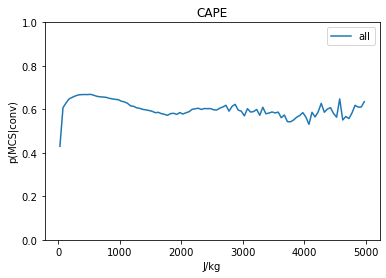

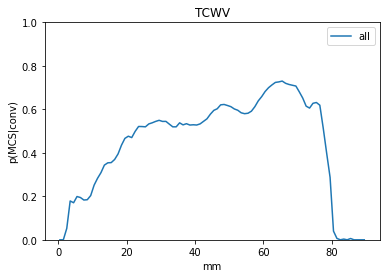

In [9]:
for v in ['cape', 'tcwv']:
    plt.figure()
    plt.title(v.upper())
    #for reg in ['all', 'land', 'ocean']:
    for reg in ['all']:
        d1 = ds2[f'{v}_MCS_core'].values.sum(axis=(0, 1))
        d2 = ds2[f'{v}_cloud_core'].values.sum(axis=(0, 1))
        #d1 = (d1 * regmask[reg][:, :, None]).sum(axis=(0, 1))
        #d2 = (d2 * regmask[reg][:, :, None]).sum(axis=(0, 1))
        d = d1 / (d1 + d2)
        # d[~regmask[reg]] = np.nan
        # print(d.shape)
        plt.plot(ds2[f'{v}_hist_mids'].values, d, label=reg)
    if v == 'cape':
        plt.xlabel('J/kg')
    elif v == 'tcwv':
        plt.xlabel('mm')
    plt.ylabel('p(MCS|conv)')
    plt.ylim((0, 1))
    plt.legend()


In [11]:
ds2.cape_MCS_core.values.shape

(481, 1440, 100)

In [12]:
def xr_add_cyclic_point(da, lon_name='longitude'):
    """Pad data array in longitude dimension.

    * Taken from https://stackoverflow.com/a/60913814/54557
    * Modified to handle data on model levels as well.
    * Use add_cyclic_point to pad input data.
    * Relies on min lon value in da being 0.

    :param da: xr.DataArray with dimensions including longitude
    :param lon_name: name of longitude dimension in da
    :returns: padded copy of da
    """
    lon_idx = da.dims.index(lon_name)
    wrap_data, wrap_lon = add_cyclic_point(da.values, coord=da.longitude, axis=lon_idx)

    # Copy old coords and modify longitude.
    new_coords = {dim: da.coords[dim] for dim in da.dims}
    new_coords[lon_name] = wrap_lon

    # Generate output DataArray with new data but same structure as input.
    out_da = xr.DataArray(data=wrap_data,
                          name=da.name,
                          coords=new_coords,
                          dims=da.dims,
                          attrs=da.attrs)
    return out_da


/tmp/ipykernel_543/192735941.py:8: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_543/192735941.py:8: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


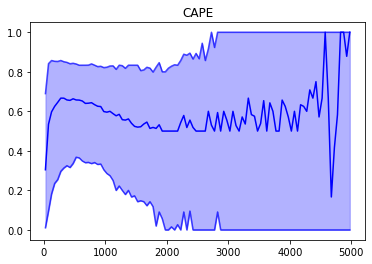

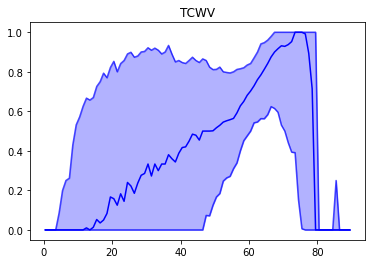

In [13]:
hists2_coarse = {}
step = 16
for v in ['cape', 'tcwv']:
    plt.figure()
    plt.title(v.upper())
    d1 = ds2[f'{v}_MCS_core'].coarsen(latitude=step, longitude=step, boundary='trim').sum().values
    d2 = ds2[f'{v}_cloud_core'].coarsen(latitude=step, longitude=step, boundary='trim').sum().values
    d = d1 / (d1 + d2)
    hists2_coarse[v] = d
    d10, d50, d90 = np.nanpercentile(d, [25, 50, 75], axis=(0, 1))

    plt.plot(ds2[f'{v}_hist_mids'].values, d50, 'b-')
    plt.plot(ds2[f'{v}_hist_mids'].values, d10, 'b-', alpha=0.7)    
    plt.plot(ds2[f'{v}_hist_mids'].values, d90, 'b-', alpha=0.7)
    plt.fill_between(ds2[f'{v}_hist_mids'].values, d10, d90, color='b', alpha=0.3)    



/tmp/ipykernel_543/1813384796.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_543/1813384796.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


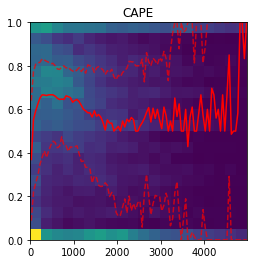

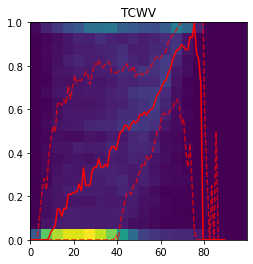

In [14]:
step = 32
nbin = 21
for v in ['cape', 'tcwv']:
    plt.figure()
    plt.title(v.upper())
    h = np.zeros((len(ds2[f'{v}_hist_mids'].values), nbin - 1))
    d1 = ds2[f'{v}_MCS_core'].coarsen(latitude=step, longitude=step, boundary='trim').sum().values
    d2 = ds2[f'{v}_cloud_core'].coarsen(latitude=step, longitude=step, boundary='trim').sum().values
    d = d1 / (d1 + d2)
    for i in range(d.shape[2]):
        h[i, :] = np.histogram(d[:, :, i], bins=np.linspace(0, 1, nbin))[0]
    h = h.reshape(-1, 5, nbin - 1).sum(axis=1)
    if v == 'cape':
        aspect = 5000
    elif v == 'tcwv':
        aspect = 100
    plt.imshow(h.T, origin='lower', extent=(0, ds2[f'{v}_hist_mids'].values[-1], 0, 1), aspect=aspect)    
    d10, d50, d90 = np.nanpercentile(d, [25, 50, 75], axis=(0, 1))

    plt.plot(ds2[f'{v}_hist_mids'].values, d50, 'r-')
    plt.plot(ds2[f'{v}_hist_mids'].values, d10, 'r--', alpha=0.7)    
    plt.plot(ds2[f'{v}_hist_mids'].values, d90, 'r--', alpha=0.7)



60
40
20
0
-20
-40
60


/tmp/ipykernel_543/107238838.py:11: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_543/107238838.py:11: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_543/107238838.py:11: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_543/107238838.py:11: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)


40
20
0
-20
-40


/tmp/ipykernel_543/107238838.py:11: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_543/107238838.py:11: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_543/107238838.py:11: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_543/107238838.py:11: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_543/107238838.py:11: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)


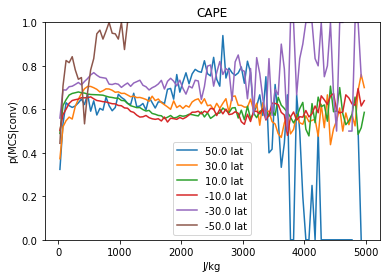

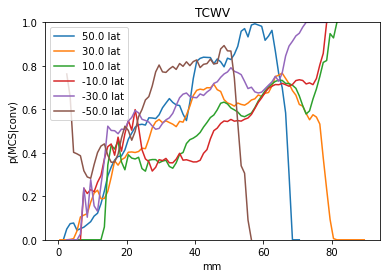

In [15]:
latstep = 20
for v in ['cape', 'tcwv']:
    plt.figure()
    plt.title(v.upper())
    for latstart in range(60, -51, -latstep):
        print(latstart)
        d1 = ds2[f'{v}_MCS_core'].sel(latitude=slice(latstart, latstart - latstep + 0.25)).values.sum(axis=(0, 1))
        d2 = ds2[f'{v}_cloud_core'].sel(latitude=slice(latstart, latstart - latstep + 0.25)).values.sum(axis=(0, 1))
        # d1 = (d1 * regmask[reg][:, :, None]).sum(axis=(0, 1))
        # d2 = (d2 * regmask[reg][:, :, None]).sum(axis=(0, 1))
        d = d1 / (d1 + d2)
        plt.plot(ds2[f'{v}_hist_mids'].values, d, label=f'{latstart - latstep / 2} lat')
    if v == 'cape':
        plt.xlabel('J/kg')
    elif v == 'tcwv':
        plt.xlabel('mm')
    plt.ylabel('p(MCS|conv)')
    plt.ylim((0, 1))
    plt.legend()

In [16]:
def rmse(a, b):
    return np.sqrt(np.nanmean((a[None, None, :] - b)**2, axis=2))

def integral_diff(a, b, dx):
    return np.nansum(b - a[None, None, :], axis=2) * dx

In [17]:
step = 16
da = ds2[f'{v}_MCS_core'].coarsen(latitude=step, longitude=step, boundary='trim').sum()

da_rmse = xr.DataArray(
    rmse(hists[('cape', 'all')], hists2_coarse['cape']),
    name='rmse',
    dims=['latitude', 'longitude'],
    coords=dict(
        latitude=da.latitude,
        longitude=da.longitude,
    )
)
da_integral_diff = xr.DataArray(
    integral_diff(hists[('cape', 'all')], hists2_coarse['cape'], 1),
    name='integral_diff',
    dims=['latitude', 'longitude'],
    coords=dict(
        latitude=da.latitude,
        longitude=da.longitude,
    )
)
ds = xr.merge([xr_add_cyclic_point(da) for da in [da_rmse, da_integral_diff]])



NameError: name 'hists' is not defined

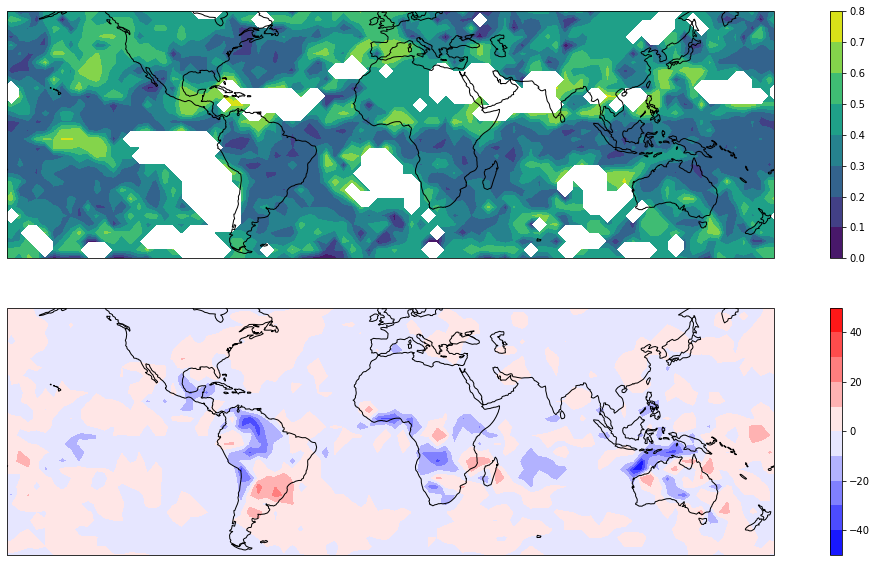

In [79]:
fig, axes = plt.subplots(2, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
fig.set_size_inches(20, 10)

im0 = axes[0].contourf(ds.longitude, ds.latitude, ds.rmse)
plt.colorbar(im0, ax=axes[0])
im1 = axes[1].contourf(ds.longitude, ds.latitude, ds.integral_diff, 
                       levels=np.linspace(-50, 50, 11), cmap='bwr')
plt.colorbar(im1, ax=axes[1])

for ax in axes:
    ax.coastlines()

In [29]:
hists[('cape', 'all')]

array([0.43402839, 0.60243996, 0.64447374, 0.67118497, 0.68989645,
       0.70548853, 0.71358867, 0.71932442, 0.72253993, 0.72237671,
       0.72008283, 0.71719873, 0.71125886, 0.70056969, 0.69278903,
       0.68472135, 0.67887294, 0.66920763, 0.66068934, 0.6538848 ,
       0.6495943 , 0.64335868, 0.63571316, 0.62923942, 0.62348822,
       0.6182326 , 0.61215533, 0.60998453, 0.6091032 , 0.60178948,
       0.60275039, 0.60042069, 0.6012424 , 0.59974599, 0.60281765,
       0.60620706, 0.60193803, 0.60885839, 0.61170857, 0.60579315,
       0.60278566, 0.61828931, 0.61567801, 0.62035629, 0.60991481,
       0.62118259, 0.6093836 , 0.61789837, 0.61604261, 0.62309177,
       0.62086277, 0.62688366, 0.60991379, 0.61107202, 0.62152602,
       0.62172812, 0.6210973 , 0.61430481, 0.63071429, 0.62062257,
       0.62510602, 0.62972973, 0.61569017, 0.64029536, 0.64614531,
       0.63216958, 0.67706303, 0.66045549, 0.65095057, 0.65357423,
       0.67263427, 0.66607774, 0.668     , 0.66266266, 0.66365

In [31]:
 hists2_coarse['cape'][0, 0]

array([0.09753812, 0.10909091, 0.1       , 0.        , 0.        ,
       0.        ,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [58]:
1440 / 32

45.0

In [31]:
np.histogram(d[:, :, 60], bins=np.linspace(0, 0.5, 11))
# np.nanpercentile(d[:, :, 50], [25, 50, 75])

(array([2, 0, 0, 0, 0, 2, 2, 0, 2, 5]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]))

In [32]:
np.nanmax(d)

1.0

In [33]:
(d2 >= d1).all()

False

In [74]:
d2

array([[[4.42985e+05, 1.35749e+05, 1.40784e+05, 1.64294e+05,
         1.89805e+05, 2.13387e+05, 2.26832e+05, 2.34330e+05,
         2.30707e+05, 2.20806e+05, 2.04829e+05, 1.84759e+05,
         1.64320e+05, 1.42650e+05, 1.24666e+05, 1.08503e+05,
         9.48080e+04, 8.16440e+04, 7.04830e+04, 6.05190e+04,
         5.30790e+04, 4.64550e+04, 4.05140e+04, 3.57150e+04,
         3.13440e+04, 2.76690e+04, 2.46870e+04, 2.20790e+04,
         1.98190e+04, 1.79580e+04, 1.62610e+04, 1.48430e+04,
         1.36470e+04, 1.22780e+04, 1.13390e+04, 1.04110e+04,
         9.44200e+03, 8.78400e+03, 8.07700e+03, 7.55000e+03,
         7.01100e+03, 6.48400e+03, 6.13400e+03, 5.71100e+03,
         5.15500e+03, 4.78000e+03, 4.42900e+03, 4.12200e+03,
         3.81700e+03, 3.55100e+03, 3.33900e+03, 3.12000e+03,
         2.83000e+03, 2.60500e+03, 2.46000e+03, 2.20900e+03,
         2.04900e+03, 1.83800e+03, 1.76600e+03, 1.59500e+03,
         1.47400e+03, 1.39800e+03, 1.24000e+03, 1.21400e+03,
         1.16500e+03, 1.

In [34]:
def calc_xlim(ds, reg='all', v='cape', cutoff=0.9999):
    hist = np.array([
        np.nansum(ds[f'{reg}_{v}_MCS_core'].values, axis=0),
        np.nansum(ds[f'{reg}_{v}_MCS_shield'].values, axis=0),
        np.nansum(ds[f'{reg}_{v}_cloud_core'].values, axis=0),
        np.nansum(ds[f'{reg}_{v}_cloud_shield'].values, axis=0),
        np.nansum(ds[f'{reg}_{v}_env'].values, axis=0),
    ]).sum(axis=0)
    idx = np.where(np.cumsum(hist) / hist.sum() > cutoff)[0][0]
    return hist, (0, ds[f'{v}_hist_mids'].values[idx])

In [35]:
def plot_hist(ds, ax=None, reg='all', v='cape', s=None, log=True):
    if s is None:
        if v == 'cape':
            s = slice(0, 500, None)
        elif v == 'tcwv':
            s = slice(0, 101, None)
        elif v[-5:] == 'shear':
            s = slice(0, 101, None)
        elif v == 'vimfd':
            s = slice(0, 101, None)            
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
    def _plot_hist(ds, ax, h, fmt, title):
        bins = ds[f'{v}_bins'].values
        width = bins[1] - bins[0]
        h_density = h / (h.sum() * width)
        ax.plot(ds[f'{v}_hist_mids'].values[s], h_density[s], fmt, label=title);

    ax.set_title(f'{v.upper()} distributions')
    _plot_hist(ds, ax, np.nansum(ds[f'{reg}_{v}_MCS_core'].values, axis=0), 'r-', 'MCS core')
    _plot_hist(ds, ax, np.nansum(ds[f'{reg}_{v}_MCS_shield'].values, axis=0), 'r--', 'MCS shield')
    _plot_hist(ds, ax, np.nansum(ds[f'{reg}_{v}_cloud_core'].values, axis=0), 'b-', 'cloud core')
    _plot_hist(ds, ax, np.nansum(ds[f'{reg}_{v}_cloud_shield'].values, axis=0), 'b--', 'cloud shield')
    _plot_hist(ds, ax, np.nansum(ds[f'{reg}_{v}_env'].values, axis=0), 'k-', 'env')
    ax.legend()
    if log:
        ax.set_yscale('log')
    if v == 'cape':
        ax.set_xlabel('CAPE (J kg$^{-1}$)')
    elif v == 'tcwv':
        ax.set_xlabel('TCWV (mm)')

In [36]:
def plot_hist_probs(ds, ax=None, reg='all', v='cape', s=None):
    if s is None:
        if v == 'cape':
            s = slice(0, 500, None)
        elif v == 'tcwv':
            s = slice(0, 101, None)
        elif v[-5:] == 'shear':
            s = slice(0, 101, None)        
        elif v == 'vimfd':
            s = slice(0, 101, None)      
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
        
    counts = np.zeros((5, ds[f'{reg}_{v}_MCS_core'].shape[1]))
    counts[0] = np.nansum(ds[f'{reg}_{v}_MCS_core'].values, axis=0)
    counts[1] = np.nansum(ds[f'{reg}_{v}_MCS_shield'].values, axis=0)
    counts[2] = np.nansum(ds[f'{reg}_{v}_cloud_core'].values, axis=0)
    counts[3] = np.nansum(ds[f'{reg}_{v}_cloud_shield'].values, axis=0)
    counts[4] = np.nansum(ds[f'{reg}_{v}_env'].values, axis=0)
    probs = counts / counts.sum(axis=0)[None, :]
    
    ax.set_title(f'{v.upper()} probabilities')
    ax.plot(ds[f'{v}_hist_mids'].values[s], probs[0][s], 'r-', label='MCS core')
    ax.plot(ds[f'{v}_hist_mids'].values[s], probs[1][s], 'r--', label='MCS shield')
    ax.plot(ds[f'{v}_hist_mids'].values[s], probs[2][s], 'b-', label='cloud core')
    ax.plot(ds[f'{v}_hist_mids'].values[s], probs[3][s], 'b--', label='cloud shield')
    ax.plot(ds[f'{v}_hist_mids'].values[s], probs[4][s], 'k-', label='env')
    ax.legend()

    if v == 'cape':
        ax.set_xlabel('CAPE (J kg$^{-1}$)')
    elif v == 'tcwv':
        ax.set_xlabel('TCWV (mm)')

/tmp/ipykernel_3318/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_3318/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_3318/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]


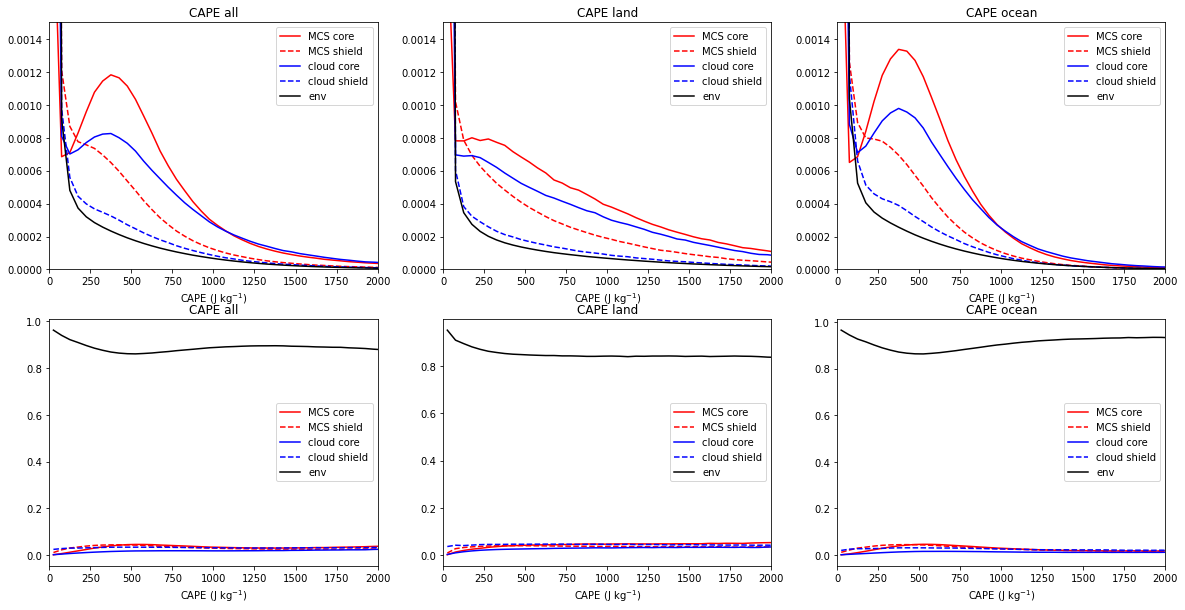

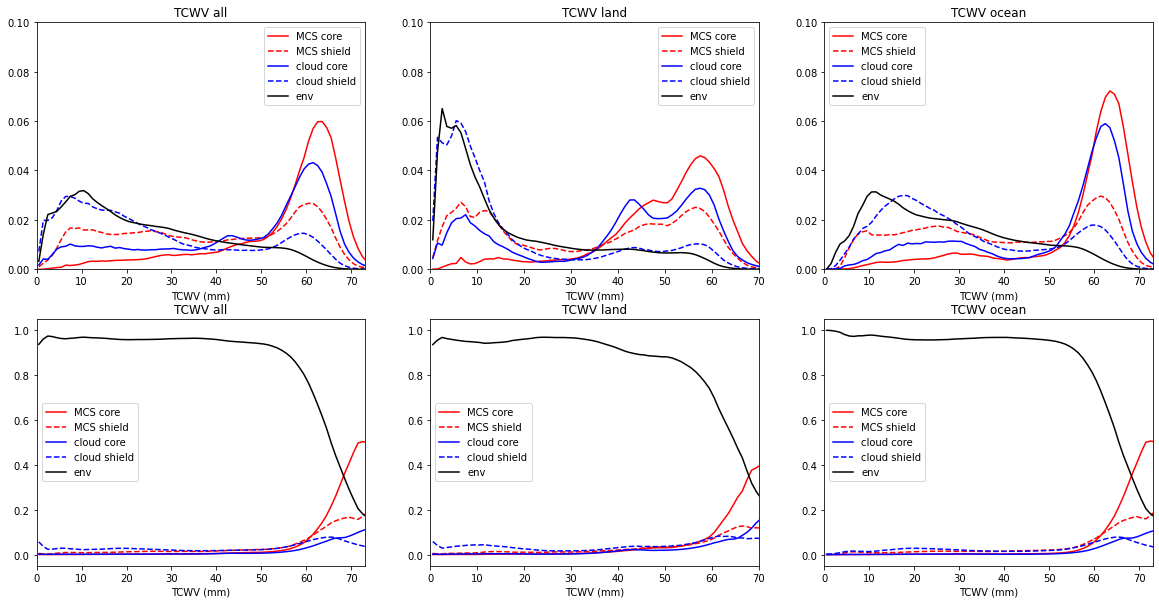

In [37]:
xlims = {
    ('cape', 'all'): (0, 2000),
    ('cape', 'land'): (0, 2000),
    ('cape', 'ocean'): (0, 2000),
    ('tcwv', 'all'): (0, 73),
    ('tcwv', 'land'): (0, 70),
    ('tcwv', 'ocean'): (0, 73),
}
for var in ['cape', 'tcwv']:
    fig, axes = plt.subplots(2, 3)
    fig.set_size_inches((20, 10))
    for ax, reg in zip(axes[0], ['all', 'land', 'ocean']):
        plot_hist(ds, ax=ax, reg=reg, v=var, log=False)
        if var == 'cape':
            ax.set_ylim((0, 0.0015))
            ax.set_title(f'CAPE {reg}')
        else:
            ax.set_ylim((0, 0.1))
            ax.set_title(f'TCWV {reg}')
        ax.set_xlim(xlims[(var, reg)])
            
    for ax, reg in zip(axes[1], ['all', 'land', 'ocean']):
        plot_hist_probs(ds, reg=reg, v=var, ax=ax)
        if var == 'cape':
            # ax.set_xlim((0, 2500))
            ax.set_title(f'CAPE {reg}')
        else:
            ax.set_title(f'TCWV {reg}')
        ax.set_xlim(xlims[(var, reg)])


/tmp/ipykernel_3318/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_3318/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_3318/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_3318/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_3318/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_3318/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_3318/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/i

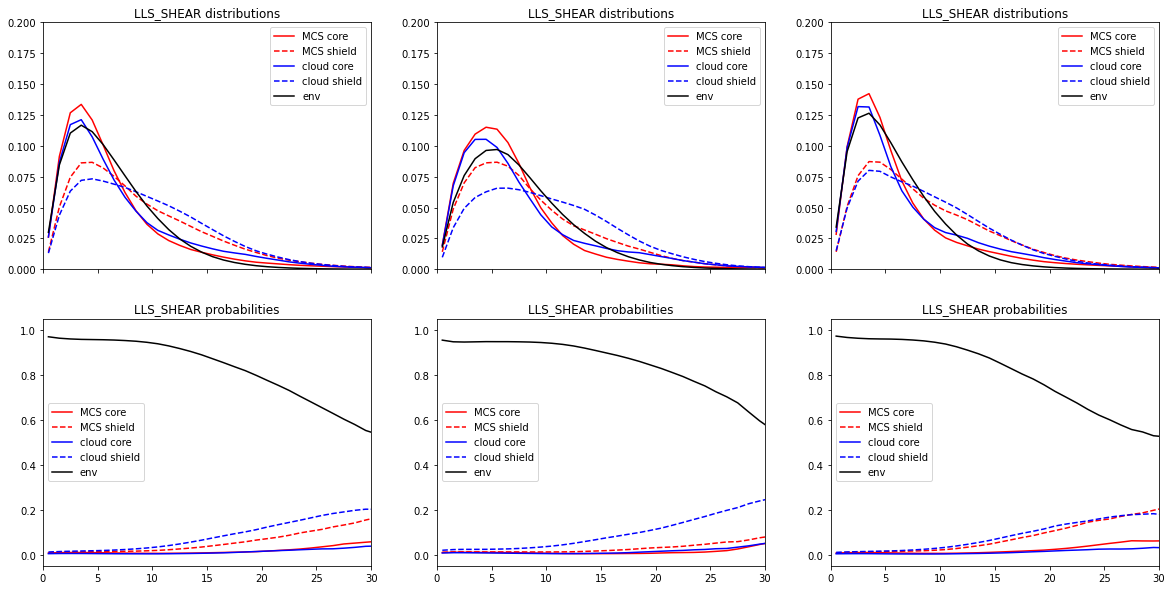

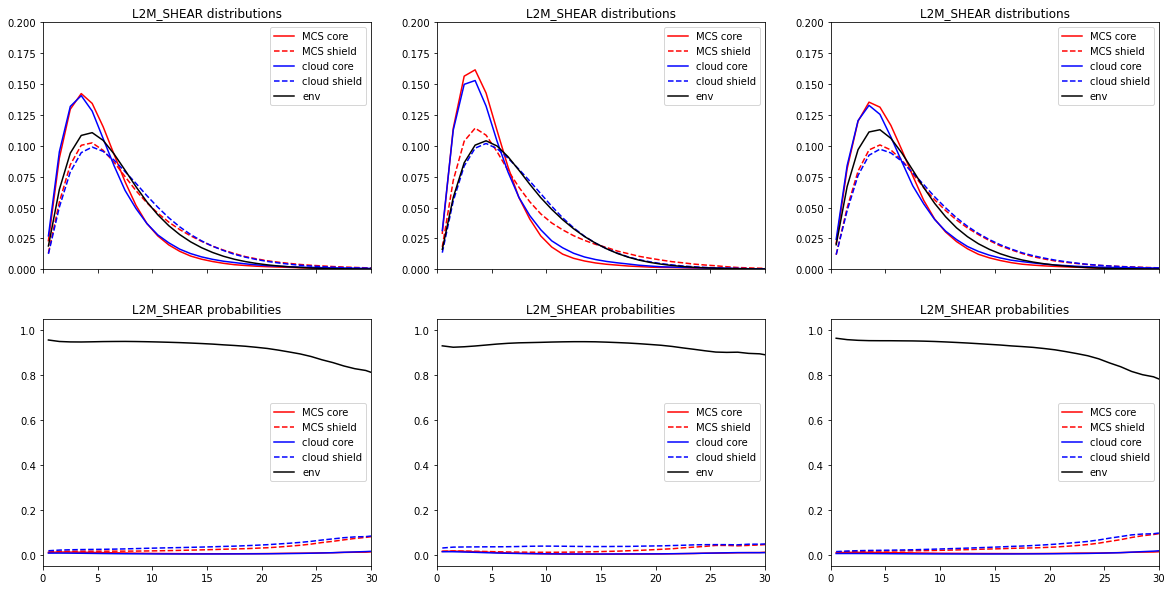

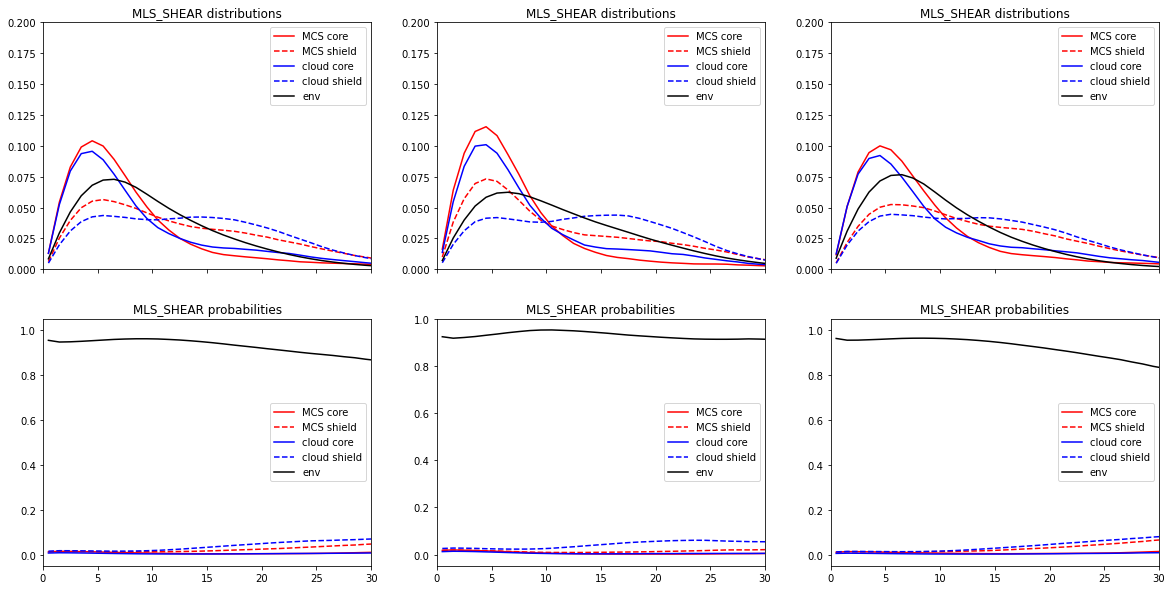

In [38]:
for var in ['LLS_shear', 'L2M_shear', 'MLS_shear']:
    fig, axes = plt.subplots(2, 3, sharex=True)
    fig.set_size_inches((20, 10))
    for ax, reg in zip(axes[0], ['all', 'land', 'ocean']):
        plot_hist(ds, ax=ax, reg=reg, v=var, log=False)
        ax.set_ylim((0, 0.2))
        ax.set_xlim((0, 30))
            
    for ax, reg in zip(axes[1], ['all', 'land', 'ocean']):
        plot_hist_probs(ds, reg=reg, v=var, ax=ax)
        ax.set_xlim((0, 30))


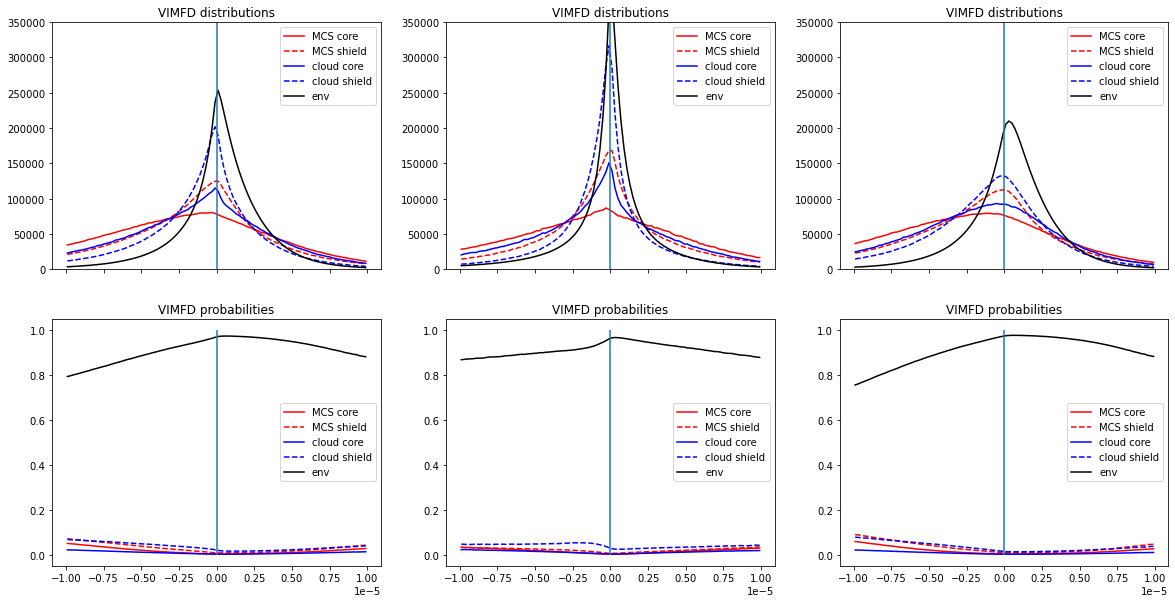

In [39]:
for var in ['vimfd']:
    fig, axes = plt.subplots(2, 3, sharex=True)
    fig.set_size_inches((20, 10))
    for ax, reg in zip(axes[0], ['all', 'land', 'ocean']):
        plot_hist(ds, ax=ax, reg=reg, v=var, log=False)
        ax.set_ylim((0, 35e4))
        ax.vlines(x=[0], ymin=0, ymax=35e4)
            
    for ax, reg in zip(axes[1], ['all', 'land', 'ocean']):
        plot_hist_probs(ds, reg=reg, v=var, ax=ax)
        ax.vlines(x=[0], ymin=0, ymax=1)


In [40]:
ds

<xarray.Dataset>
Dimensions:                       (time: 726, cape_hist_mid: 100,
                                   tcwv_hist_mid: 100, LLS_shear_hist_mid: 100,
                                   L2M_shear_hist_mid: 100,
                                   MLS_shear_hist_mid: 100,
                                   vimfd_hist_mid: 100, cape_hist_mids: 100,
                                   cape_bins: 101, tcwv_hist_mids: 100,
                                   ...
                                   LLS_shear_bins: 101,
                                   L2M_shear_hist_mids: 100,
                                   L2M_shear_bins: 101,
                                   MLS_shear_hist_mids: 100,
                                   MLS_shear_bins: 101, vimfd_hist_mids: 100,
                                   vimfd_bins: 101)
Coordinates: (12/13)
  * time                          (time) datetime64[ns] 2020-01-01T00:30:00 ....
  * cape_hist_mids                (cape_hist_mids) float64 25.0 ... 4.975e+03
  * cape_bins                     (cape_bins) float64 0.0 50.0 ... 5e+03
  * tcwv_hist_mids                (tcwv_hist_mids) float64 0.5 1.5 ... 98.5 99.5
  * tcwv_bins                     (tcwv_bins) float64 0.0 1.0 2.0 ... 99.0 100.0
  * LLS_shear_hist_mids           (LLS_shear_hist_mids) float64 0.5 1.5 ... 99.5
    ...                            ...
  * L2M_shear_hist_mids           (L2M_shear_hist_mids) float64 0.5 1.5 ... 99.5
  * L2M_shear_bins                (L2M_shear_bins) float64 0.0 1.0 ... 100.0
  * MLS_shear_hist_mids           (MLS_shear_hist_mids) float64 0.5 1.5 ... 99.5
  * MLS_shear_bins                (MLS_shear_bins) float64 0.0 1.0 ... 100.0
  * vimfd_hist_mids               (vimfd_hist_mids) float64 -9.9e-06 ... 9.9e-06
  * vimfd_bins                    (vimfd_bins) float64 -1e-05 -9.8e-06 ... 1e-05
Dimensions without coordinates: cape_hist_mid, tcwv_hist_mid,
                                LLS_shear_hist_mid, L2M_shear_hist_mid,
                                MLS_shear_hist_mid, vimfd_hist_mid
Data variables: (12/90)
    all_cape_MCS_shield           (time, cape_hist_mid) float64 2.213e+03 ......
    all_cape_MCS_core             (time, cape_hist_mid) float64 115.0 ... 0.0
    all_cape_cloud_shield         (time, cape_hist_mid) float64 1.546e+04 ......
    all_cape_cloud_core           (time, cape_hist_mid) float64 1.564e+03 ......
    all_cape_env                  (time, cape_hist_mid) float64 5.054e+05 ......
    land_cape_MCS_shield          (time, cape_hist_mid) float64 57.0 ... 0.0
    ...                            ...
    land_vimfd_env                (time, vimfd_hist_mid) float64 174.0 ... 124.0
    ocean_vimfd_MCS_shield        (time, vimfd_hist_mid) float64 15.0 ... 12.0
    ocean_vimfd_MCS_core          (time, vimfd_hist_mid) float64 16.0 ... 3.0
    ocean_vimfd_cloud_shield      (time, vimfd_hist_mid) float64 32.0 ... 13.0
    ocean_vimfd_cloud_core        (time, vimfd_hist_mid) float64 12.0 ... 2.0
    ocean_vimfd_env               (time, vimfd_hist_mid) float64 291.0 ... 206.0

# Experimental

In [21]:
nx = len(ds2.longitude)
ny = len(ds2.latitude)

nstep = 16
xstep = nstep
ystep = nstep

ivals = list(range(ny // ystep))
jvals = list(range(nx // xstep))

outdata = np.zeros((len(ivals), len(jvals) + 1))

lats = ds2.latitude.values[:-1].reshape(-1, ystep).mean(axis=1)
lats[-1] = ds2.latitude.values[ystep * (len(ivals) -1):].mean()
print(lats)
lons = ds2.longitude.values.reshape(-1, xstep).mean(axis=1)
lons[-1] = ds2.longitude.values[xstep * (len(jvals) -1):].mean()

print(lons)

for i in ivals:
    if i == ivals[-1]:
        latslice = slice(i * ystep, None)
    else:
        latslice = slice(i * ystep, (i + 1) * ystep)
        
    for j in range(nx // xstep):
        if j == jvals[-1]:
            lonslice = slice(j * xstep, None)
        else:
            lonslice = slice(j * xstep, (j + 1) * xstep)

        s = (latslice, lonslice, None)
        outdata[i, j] = ds2.cape_MCS_core.values[s].mean()

outdata[:, -1] = outdata[:, 0]
lons = np.concatenate([lons, lons[:1]])

[ 58.125  54.125  50.125  46.125  42.125  38.125  34.125  30.125  26.125
  22.125  18.125  14.125  10.125   6.125   2.125  -1.875  -5.875  -9.875
 -13.875 -17.875 -21.875 -25.875 -29.875 -33.875 -37.875 -41.875 -45.875
 -49.875 -53.875 -58.   ]
[  1.875   5.875   9.875  13.875  17.875  21.875  25.875  29.875  33.875
  37.875  41.875  45.875  49.875  53.875  57.875  61.875  65.875  69.875
  73.875  77.875  81.875  85.875  89.875  93.875  97.875 101.875 105.875
 109.875 113.875 117.875 121.875 125.875 129.875 133.875 137.875 141.875
 145.875 149.875 153.875 157.875 161.875 165.875 169.875 173.875 177.875
 181.875 185.875 189.875 193.875 197.875 201.875 205.875 209.875 213.875
 217.875 221.875 225.875 229.875 233.875 237.875 241.875 245.875 249.875
 253.875 257.875 261.875 265.875 269.875 273.875 277.875 281.875 285.875
 289.875 293.875 297.875 301.875 305.875 309.875 313.875 317.875 321.875
 325.875 329.875 333.875 337.875 341.875 345.875 349.875 353.875 357.875]


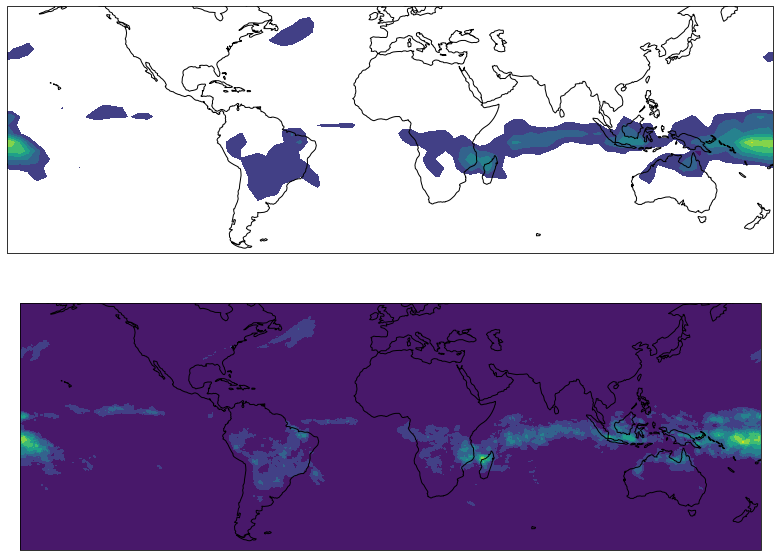

In [22]:
fig, axes = plt.subplots(2, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
fig.set_size_inches(20, 10)
axes[0].contourf(lons, lats, outdata)
axes[1].contourf(ds2.longitude.values, ds2.latitude.values, ds2.cape_MCS_core.values.mean(axis=2))
for ax in axes:
    ax.coastlines()

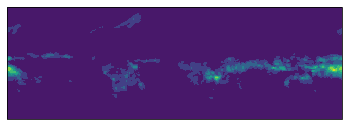

In [23]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.contourf(ds2.longitude.values, ds2.latitude.values, ds2.cape_MCS_core.values.mean(axis=2))

# Tracks only splitting into land/ocean. Not used as I'm doing this on pixel data.

In [19]:
tracks = McsTracks.open(PATHS['statsdir'] / 'mcs_tracks_final_extc_20190101.0000_20200101.0000.nc', 
                        PATHS['pixeldir'])
ntracks = len(tracks.dstracks.tracks)

In [20]:
tracks.dstracks

<xarray.Dataset>
Dimensions:                  (tracks: 32843, times: 400, mergers: 50, nmaxpf: 3)
Coordinates:
  * tracks                   (tracks) int64 0 1 2 3 ... 32839 32840 32841 32842
  * times                    (times) int64 0 1 2 3 4 5 ... 395 396 397 398 399
  * mergers                  (mergers) int64 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
  * nmaxpf                   (nmaxpf) int64 0 1 2
Data variables: (12/55)
    track_duration           (tracks) int32 ...
    start_status             (tracks) float64 ...
    end_status               (tracks) float64 ...
    start_basetime           (tracks) datetime64[ns] 2019-01-01T00:30:00 ... ...
    end_basetime             (tracks) datetime64[ns] 2019-01-02T12:30:00 ... ...
    start_split_cloudnumber  (tracks) float64 ...
    ...                       ...
    pf_mcsstatus             (tracks, times) float64 ...
    movement_distance        (tracks, times) float32 ...
    movement_speed           (tracks, times) float32 ...
    movement_theta           (tracks, times) float32 ...
    movement_distance_x      (tracks, times) float32 ...
    movement_distance_y      (tracks, times) float32 ...
Attributes: (12/23)
    Title:                       Statistics of each MCS track
    Institution:                 Pacific Northwest National Laboratory
    Contact:                     Zhe Feng, zhe.feng@pnnl.gov
    Created_on:                  Mon Feb 28 05:50:54 2022
    startdate:                   20190101.0000
    enddate:                     20200101.0000
    ...                          ...
    PF_PF_min_majoraxis_thresh:  20
    coefs_pf_area:               [2874.05    89.825]
    coefs_pf_rr:                 [3.01657   0.0144461]
    coefs_pf_skew:               [0.194462  0.0100072]
    coefs_pf_heavyratio:         [3.419024 0.438709]
    max_speed_thresh:            50

In [21]:
nanmask = np.isnan(tracks.dstracks.pf_landfrac.values)

In [22]:
landmask = np.nanmean(tracks.dstracks.pf_landfrac.values, axis=1) >= 0.9
ocmask = np.nanmean(tracks.dstracks.pf_landfrac.values, axis=1) < 0.1

In [23]:
landtracks = McsTracks(tracks.dstracks.isel(tracks=landmask))
octracks = McsTracks(tracks.dstracks.isel(tracks=ocmask))

In [24]:
landtracks.dstracks

<xarray.Dataset>
Dimensions:                  (tracks: 8254, times: 400, mergers: 50, nmaxpf: 3)
Coordinates:
  * tracks                   (tracks) int64 11 12 15 18 ... 32839 32840 32842
  * times                    (times) int64 0 1 2 3 4 5 ... 395 396 397 398 399
  * mergers                  (mergers) int64 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
  * nmaxpf                   (nmaxpf) int64 0 1 2
Data variables: (12/55)
    track_duration           (tracks) int32 20 12 10 13 11 11 20 ... 8 7 7 6 7 5
    start_status             (tracks) float64 13.0 1.0 15.0 1.0 ... 2.0 1.0 44.0
    end_status               (tracks) float64 21.0 0.0 0.0 3.0 ... 24.0 3.0 3.0
    start_basetime           (tracks) datetime64[ns] 2019-01-01T00:30:00 ... ...
    end_basetime             (tracks) datetime64[ns] 2019-01-01T19:30:00 ... ...
    start_split_cloudnumber  (tracks) float64 nan nan nan nan ... nan nan 17.0
    ...                       ...
    pf_mcsstatus             (tracks, times) float64 ...
    movement_distance        (tracks, times) float32 ...
    movement_speed           (tracks, times) float32 ...
    movement_theta           (tracks, times) float32 ...
    movement_distance_x      (tracks, times) float32 ...
    movement_distance_y      (tracks, times) float32 ...
Attributes: (12/23)
    Title:                       Statistics of each MCS track
    Institution:                 Pacific Northwest National Laboratory
    Contact:                     Zhe Feng, zhe.feng@pnnl.gov
    Created_on:                  Mon Feb 28 05:50:54 2022
    startdate:                   20190101.0000
    enddate:                     20200101.0000
    ...                          ...
    PF_PF_min_majoraxis_thresh:  20
    coefs_pf_area:               [2874.05    89.825]
    coefs_pf_rr:                 [3.01657   0.0144461]
    coefs_pf_skew:               [0.194462  0.0100072]
    coefs_pf_heavyratio:         [3.419024 0.438709]
    max_speed_thresh:            50

In [25]:
octracks.dstracks

<xarray.Dataset>
Dimensions:                  (tracks: 17564, times: 400, mergers: 50, nmaxpf: 3)
Coordinates:
  * tracks                   (tracks) int64 0 2 3 4 ... 32832 32834 32835 32841
  * times                    (times) int64 0 1 2 3 4 5 ... 395 396 397 398 399
  * mergers                  (mergers) int64 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
  * nmaxpf                   (nmaxpf) int64 0 1 2
Data variables: (12/55)
    track_duration           (tracks) int32 37 17 40 12 16 9 8 ... 10 10 6 8 8 6
    start_status             (tracks) float64 13.0 13.0 15.0 ... 2.0 1.0 32.0
    end_status               (tracks) float64 37.0 0.0 3.0 34.0 ... 3.0 3.0 0.0
    start_basetime           (tracks) datetime64[ns] 2019-01-01T00:30:00 ... ...
    end_basetime             (tracks) datetime64[ns] 2019-01-02T12:30:00 ... ...
    start_split_cloudnumber  (tracks) float64 nan nan nan nan ... nan nan 60.0
    ...                       ...
    pf_mcsstatus             (tracks, times) float64 ...
    movement_distance        (tracks, times) float32 ...
    movement_speed           (tracks, times) float32 ...
    movement_theta           (tracks, times) float32 ...
    movement_distance_x      (tracks, times) float32 ...
    movement_distance_y      (tracks, times) float32 ...
Attributes: (12/23)
    Title:                       Statistics of each MCS track
    Institution:                 Pacific Northwest National Laboratory
    Contact:                     Zhe Feng, zhe.feng@pnnl.gov
    Created_on:                  Mon Feb 28 05:50:54 2022
    startdate:                   20190101.0000
    enddate:                     20200101.0000
    ...                          ...
    PF_PF_min_majoraxis_thresh:  20
    coefs_pf_area:               [2874.05    89.825]
    coefs_pf_rr:                 [3.01657   0.0144461]
    coefs_pf_skew:               [0.194462  0.0100072]
    coefs_pf_heavyratio:         [3.419024 0.438709]
    max_speed_thresh:            50

In [26]:
for thresh in [0.9, 0.95, 0.99, 1]:
    print(thresh, (np.nanmean(tracks.dstracks.pf_landfrac.values, axis=1) >= thresh).sum())

0.9 8254
0.95 7684
0.99 6881
1 5944


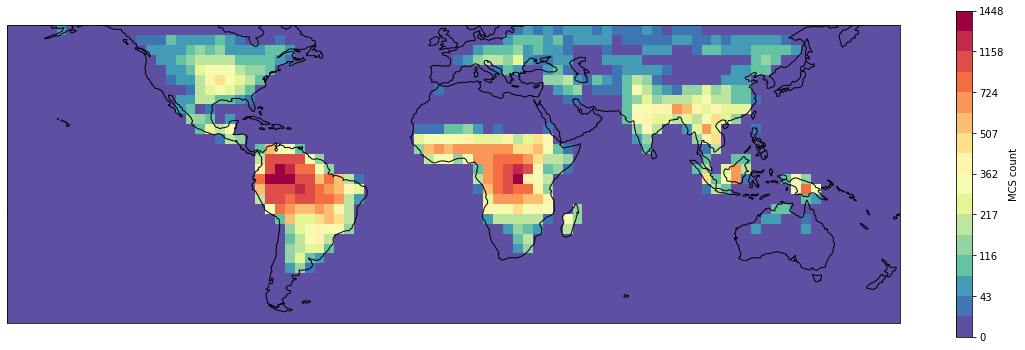

In [27]:
mplt.plot_geog_histogram(landtracks)

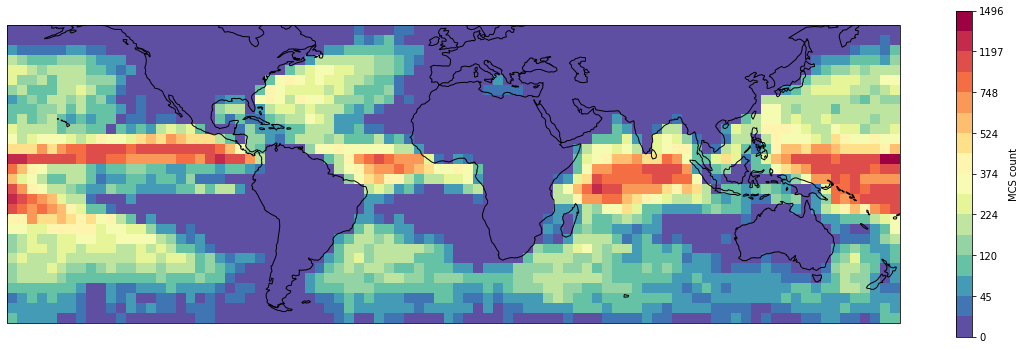

In [28]:
mplt.plot_geog_histogram(octracks)

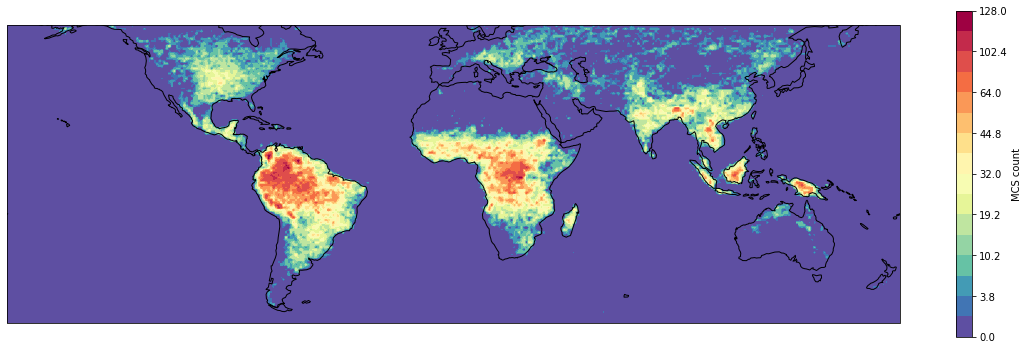

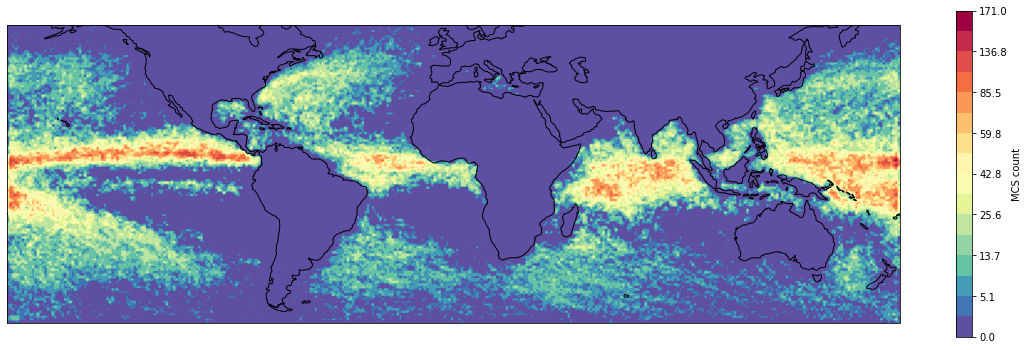

In [29]:
mplt.plot_geog_histogram(landtracks, dx=1, dy=1)
mplt.plot_geog_histogram(octracks, dx=1, dy=1)

# OLD - when each var had its own task.

In [ ]:
raise Exception('Do not run these cells! Want to keep output')

In [ ]:
def plot_hist(ds, ax=None, v='cape', s=None, log=True):
    if s is None:
        if v == 'cape':
            s = slice(0, 500, None)
        elif v == 'tcwv':
            s = slice(0, 101, None)
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
    def _plot_hist(ds, ax, h, fmt, title):
        bins = ds.bins.values
        width = bins[1] - bins[0]
        h_density = h / (h.sum() * width)
        ax.plot(ds.hist_mid.values[s], h_density[s], fmt, label=title);

    ax.set_title(f'{v.upper()} distributions')
    _plot_hist(ds, ax, np.nansum(ds[f'{v}_MCS_core'].values, axis=0), 'r-', 'MCS core')
    _plot_hist(ds, ax, np.nansum(ds[f'{v}_MCS_shield'].values, axis=0), 'r--', 'MCS shield')
    _plot_hist(ds, ax, np.nansum(ds[f'{v}_cloud_core'].values, axis=0), 'b-', 'cloud core')
    _plot_hist(ds, ax, np.nansum(ds[f'{v}_cloud_shield'].values, axis=0), 'b--', 'cloud shield')
    _plot_hist(ds, ax, np.nansum(ds[f'{v}_env'].values, axis=0), 'k-', 'env')
    ax.legend()
    if log:
        ax.set_yscale('log')
    if v == 'cape':
        ax.set_xlabel('CAPE (J kg$^{-1}$)')
    elif v == 'tcwv':
        ax.set_xlabel('TCWV (mm)')

In [ ]:
def plot_hist_probs(ds, ax=None, v='cape', s=None):
    if s is None:
        if v == 'cape':
            s = slice(0, 500, None)
        elif v == 'tcwv':
            s = slice(0, 101, None)
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
        
    counts = np.zeros((5, ds[f'{v}_MCS_core'].shape[1]))
    counts[0] = np.nansum(ds[f'{v}_MCS_core'].values, axis=0)
    counts[1] = np.nansum(ds[f'{v}_MCS_shield'].values, axis=0)
    counts[2] = np.nansum(ds[f'{v}_cloud_core'].values, axis=0)
    counts[3] = np.nansum(ds[f'{v}_cloud_shield'].values, axis=0)
    counts[4] = np.nansum(ds[f'{v}_env'].values, axis=0)
    probs = counts / counts.sum(axis=0)[None, :]
    
    ax.set_title(f'{v.upper()} probabilities')
    ax.plot(ds.hist_mid.values[s], probs[0][s], 'r-', label='MCS core')
    ax.plot(ds.hist_mid.values[s], probs[1][s], 'r--', label='MCS shield')
    ax.plot(ds.hist_mid.values[s], probs[2][s], 'b-', label='cloud core')
    ax.plot(ds.hist_mid.values[s], probs[3][s], 'b--', label='cloud shield')
    ax.plot(ds.hist_mid.values[s], probs[4][s], 'k-', label='env')
    ax.legend()

    if v == 'cape':
        ax.set_xlabel('CAPE (J kg$^{-1}$)')
    elif v == 'tcwv':
        ax.set_xlabel('TCWV (mm)')

In [ ]:
cape_paths = {r: era5_hists.OldCombineConditionalERA5Hist.tasks.filter(var='cape', region=r)[0].outputs['hist']
              for r in ['all', 'land', 'ocean']}

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=True)
fig.set_size_inches((20, 10))
for ax, reg in zip(axes[0], ['all', 'land', 'ocean']):
    ds_cape = xr.open_dataset(cape_paths[reg])
    plot_hist(ds_cape, ax=ax, log=False)
    ax.set_xlim((0, 2500))
    ax.set_ylim((0, 0.0014))
    ax.set_title(f'CAPE {reg}')
for ax, reg in zip(axes[1], ['all', 'land', 'ocean']):
    ds_cape = xr.open_dataset(cape_paths[reg])
    plot_hist_probs(ds_cape, ax=ax)
    ax.set_xlim((0, 2500))
    ax.set_title(f'CAPE {reg}')

In [ ]:
tcwv_paths = {r: era5_hists.OldCombineConditionalERA5Hist.tasks.filter(var='tcwv', region=r)[0].outputs['hist']
              for r in ['all', 'land', 'ocean']}

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=True)
fig.set_size_inches((20, 10))
for ax, reg in zip(axes[0], ['all', 'land', 'ocean']):
    ds_tcwv = xr.open_dataset(tcwv_paths[reg])
    plot_hist(ds_tcwv, ax=ax, v='tcwv', log=False)
    ax.set_ylim((0, 0.08))
    ax.set_title(f'TCWV {reg}')
for ax, reg in zip(axes[1], ['all', 'land', 'ocean']):
    ds_tcwv = xr.open_dataset(tcwv_paths[reg])
    plot_hist_probs(ds_tcwv, ax=ax, v='tcwv')
    ax.set_title(f'TCWV {reg}')

In [ ]:
t = era5_hists.ConditionalERA5Hist.tasks[0]

In [ ]:
t.inputs['era5_2020-01-01 00:00:00']

In [ ]:
t.inputs['e5pixel']

In [ ]:
xr.open_dataarray(t.inputs['era5_2020-01-01 00:00:00'])

In [ ]:
xr.open_dataarray(t.inputs['ERA5_land_sea_mask'])

In [ ]:
xr.open_dataset(t.inputs['e5pixel'])